In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["PYTORCH_USE_CUDA_DSA"] = "1"
import numpy as np
import torch
import yaml
import pickle as pk
# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import sys,os
import readgadget
import MAS_library as MASL
import pickle as pk
import readfof
import matplotlib

import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline



%load_ext Cython



        


In [2]:
import readfof
import sys, os
import numpy as np
import pickle as pk 
# from nbodykit.lab import *
import h5py as h5
import numpy as np
import Pk_library as PKL
import MAS_library as MASL
import yaml
# import galactic_wavelets as gw





In [3]:
# saved = {'pos_all':pos_all_concat,
#             'pos_all_truth':pos_all_truth_concat,
#             'Mhalo_all':Mhalo_all_concat,
#             'Mhalo_all_truth':Mhalo_all_truth_concat,
#             'Nhalo_all':Nhalo_all_concat,
#             'Nhalo_all_truth':Nhalo_all_truth_concat,
#             # 'Pk_all':Pk_all_concat,
#             # 'Pk_all_truth':Pk_all_truth_concat
#             }

# pk.dump(saved, open(f'/mnt/home/spandey/ceph/CHARFORMER/results/pos_M_Nhalo_all_truth_concat_PM_isim_{isim_fid}_nvocab_64_nembed_64_Mmin_1e13p5.pkl', 'wb'))




In [3]:
N_halo_edges = np.linspace(-0.5, 20.5, 22)
lgM_halo_edges = np.linspace(13.5, 15.5, 21)

N_halo_centers = 0.5*(N_halo_edges[1:] + N_halo_edges[:-1])
lgM_halo_centers = 0.5*(lgM_halo_edges[1:] + lgM_halo_edges[:-1])



In [4]:
grid_Pk_full = 512
threads = 10
MAS = 'CIC'

M1 = 14.0
alpha = 0.0

isim_fid = 0
saved = pk.load(open(f'/mnt/home/spandey/ceph/GOTHAM/results/pos_M_Nhalo_all_truth_concat_PM_isim_{isim_fid}_nvocab_64_nembed_64_Mmin_1e13p5.pkl', 'rb'))

pos_all = np.array(saved['pos_all'])
pos_all_truth = np.array(saved['pos_all_truth'])
Mhalo_all = np.array(saved['Mhalo_all'])
Mhalo_all_truth = np.array(saved['Mhalo_all_truth'])


mesh_truth = np.zeros((grid_Pk_full, grid_Pk_full, grid_Pk_full), dtype=np.float32)
indsel_M = np.arange(len(Mhalo_all_truth)).astype(int)
W = (10**Mhalo_all_truth/10**M1)**(alpha)
MASL.MA(pos_all_truth.astype(np.float32), mesh_truth, 1000., MAS, W=W.astype(np.float32))
mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
Pk_truth_full = PKL.Pk(mesh_truth, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)



In [5]:
from tqdm import tqdm
isim_fid_array = np.arange(0,11)

N_halo_hist_all = np.zeros((len(N_halo_centers), len(isim_fid_array)))
N_halo_hist_truth_all = np.zeros((len(N_halo_centers), len(isim_fid_array)))

M_halo_hist_all = np.zeros((len(lgM_halo_centers), len(isim_fid_array)))
M_halo_hist_truth_all = np.zeros((len(lgM_halo_centers), len(isim_fid_array)))

Pk_halos_all = np.zeros((len(isim_fid_array), len(Pk_truth_full.k3D)))
Pk_truth_all = np.zeros((len(isim_fid_array), len(Pk_truth_full.k3D)))


Pk_halos_all_weighted = np.zeros((len(isim_fid_array), len(Pk_truth_full.k3D)))
Pk_truth_all_weighted = np.zeros((len(isim_fid_array), len(Pk_truth_full.k3D)))


for ji in tqdm(range(len(isim_fid_array))):
    isim_fid = isim_fid_array[ji]
    saved = pk.load(open(f'/mnt/home/spandey/ceph/CHARFORMER/results/pos_M_Nhalo_all_truth_concat_PM_isim_{isim_fid}_nvocab_64_nembed_64_Mmin_1e13p5.pkl', 'rb'))

    pos_all = np.array(saved['pos_all'])
    pos_all_truth = np.array(saved['pos_all_truth'])
    Mhalo_all = np.array(saved['Mhalo_all'])
    Mhalo_all_truth = np.array(saved['Mhalo_all_truth'])
    Nhalo_all = np.array(saved['Nhalo_all'])
    Nhalo_all_truth = np.array(saved['Nhalo_all_truth'])

    N_halo_hist = np.histogram(Nhalo_all, bins=N_halo_edges)[0]
    N_halo_hist_all[:, ji] = N_halo_hist
    N_halo_hist_truth = np.histogram(Nhalo_all_truth, bins=N_halo_edges)[0]
    N_halo_hist_truth_all[:, ji] = N_halo_hist_truth

    M_halo_hist = np.histogram(Mhalo_all, bins=lgM_halo_edges)[0]
    M_halo_hist_all[:, ji] = M_halo_hist
    M_halo_hist_truth = np.histogram(Mhalo_all_truth, bins=lgM_halo_edges)[0]
    M_halo_hist_truth_all[:, ji] = M_halo_hist_truth

    M1 = 14.0
    alpha = 0.0

    mesh_truth = np.zeros((grid_Pk_full, grid_Pk_full, grid_Pk_full), dtype=np.float32)
    W = (10**Mhalo_all_truth/10**M1)**(alpha)
    MASL.MA(pos_all_truth.astype(np.float32), mesh_truth, 1000., MAS, W=W.astype(np.float32))
    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
    Pk_truth_full = PKL.Pk(mesh_truth, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)

    mesh_mock = np.zeros((grid_Pk_full, grid_Pk_full, grid_Pk_full), dtype=np.float32)
    W = (10**np.array(Mhalo_all)/10**M1)**(alpha)
    MASL.MA(pos_all.astype(np.float32), mesh_mock, 1000., MAS, W=W.astype(np.float32))
    mesh_mock /= np.mean(mesh_mock, dtype=np.float64);  mesh_mock -= 1.0
    Pk_mock_full = PKL.Pk(mesh_mock, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)

    Pk_halos_all[ji] = Pk_mock_full.Pk[:,0]
    Pk_truth_all[ji] = Pk_truth_full.Pk[:,0]

    M1 = 14.0
    alpha = 0.66
    mesh_truth = np.zeros((grid_Pk_full, grid_Pk_full, grid_Pk_full), dtype=np.float32)
    W = (10**Mhalo_all_truth/10**M1)**(alpha)
    MASL.MA(pos_all_truth.astype(np.float32), mesh_truth, 1000., MAS, W=W.astype(np.float32))
    mesh_truth /= np.mean(mesh_truth, dtype=np.float64);  mesh_truth -= 1.0
    Pk_truth_full = PKL.Pk(mesh_truth, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)

    mesh_mock = np.zeros((grid_Pk_full, grid_Pk_full, grid_Pk_full), dtype=np.float32)
    W = (10**np.array(Mhalo_all)/10**M1)**(alpha)
    MASL.MA(pos_all.astype(np.float32), mesh_mock, 1000., MAS, W=W.astype(np.float32))
    mesh_mock /= np.mean(mesh_mock, dtype=np.float64);  mesh_mock -= 1.0
    Pk_mock_full = PKL.Pk(mesh_mock, 1000., axis=0, MAS=MAS, threads=threads, verbose=False)

    Pk_halos_all_weighted[ji] = Pk_mock_full.Pk[:,0]
    Pk_truth_all_weighted[ji] = Pk_truth_full.Pk[:,0]



100%|██████████| 11/11 [03:31<00:00, 19.25s/it]


In [6]:
N_halo_mean_all = np.mean(N_halo_hist_all, axis=1)
N_halo_std_all = np.std(N_halo_hist_all, axis=1)

N_halo_mean_truth_all = np.mean(N_halo_hist_truth_all, axis=1)
N_halo_std_truth_all = np.std(N_halo_hist_truth_all, axis=1)

M_halo_mean_all = np.mean(M_halo_hist_all, axis=1)
M_halo_std_all = np.std(M_halo_hist_all, axis=1)

M_halo_mean_truth_all = np.mean(M_halo_hist_truth_all, axis=1)
M_halo_std_truth_all = np.std(M_halo_hist_truth_all, axis=1)



In [7]:
Pk_halos_mean = np.mean(Pk_halos_all, axis=0)
Pk_halos_std = np.std(Pk_halos_all, axis=0)

Pk_truth_mean = np.mean(Pk_truth_all, axis=0)
Pk_truth_std = np.std(Pk_truth_all, axis=0)

Pk_halos_mean_weighted = np.mean(Pk_halos_all_weighted, axis=0)
Pk_halos_std_weighted = np.std(Pk_halos_all_weighted, axis=0)

Pk_truth_mean_weighted = np.mean(Pk_truth_all_weighted, axis=0)
Pk_truth_std_weighted = np.std(Pk_truth_all_weighted, axis=0)



In [8]:
Pk_ratio = Pk_halos_all/Pk_truth_all
Pk_ratio_mean = np.mean(Pk_ratio, axis=0)
Pk_ratio_std = np.std(Pk_ratio, axis=0)

Pk_ratio_weighted = Pk_halos_all_weighted/Pk_truth_all_weighted
Pk_ratio_mean_weighted = np.mean(Pk_ratio_weighted, axis=0)
Pk_ratio_std_weighted = np.std(Pk_ratio_weighted, axis=0)


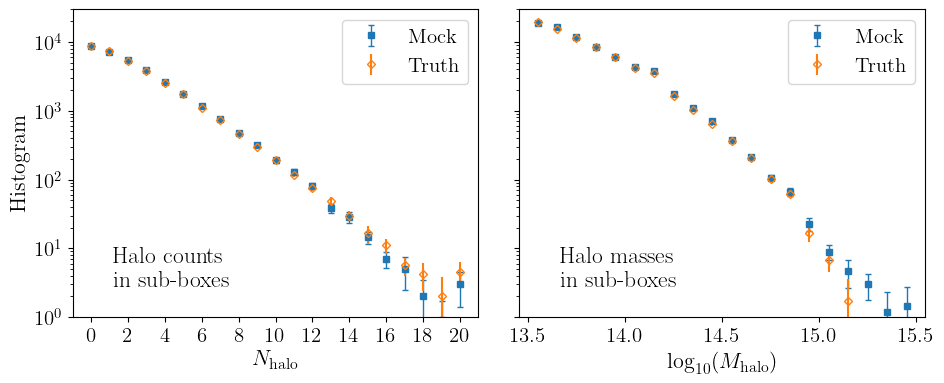

In [17]:
# pl.figure()
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(11, 4), sharey=True)
# set spacing between subplots:
pl.subplots_adjust(wspace=0.1)
ax1.errorbar(N_halo_centers, N_halo_mean_all, N_halo_std_all, ms=4.0, ls='', marker='s', label='Mock', elinewidth=1.0, capsize=2.0, capthick=1.0)
ax1.errorbar(N_halo_centers, N_halo_mean_truth_all, N_halo_std_truth_all, ms=4.0, ls='', marker='D', label='Truth', markerfacecolor='none')
ax1.legend(fontsize=15)
ax1.set_yscale('log')
# set x-ticks to be even integers:
_ = ax1.set_xticks(np.arange(0, 21, 2))
# put text inside the figure:
ax1.text(0.1, 0.1, r'Halo counts' + '\n' + 'in sub-boxes', fontsize=17, transform=ax1.transAxes)
ax1.tick_params(axis='both', labelsize=15)
ax1.set_xlabel(r'$N_{\rm halo}$', fontsize=16)
ax1.set_ylabel('Histogram', fontsize=16)

ax2.errorbar(lgM_halo_centers, M_halo_mean_all, M_halo_std_all, ms=4.0, ls='', marker='s', label='Mock', elinewidth=1.0, capsize=2.0, capthick=1.0)
ax2.errorbar(lgM_halo_centers, M_halo_mean_truth_all, M_halo_std_truth_all, ms=4.0, ls='', marker='D', label='Truth', markerfacecolor='none')
ax2.legend(fontsize=15)
ax2.set_yscale('log')
ax2.text(0.1, 0.1, r'Halo masses' + '\n' + 'in sub-boxes', fontsize=17, transform=ax2.transAxes)
ax2.tick_params(axis='both', labelsize=15)
ax2.set_xlabel(r'$\log_{10}(M_{\rm halo})$', fontsize=16)
# ax2.ylabel('Histogram', fontsize=16)
ax2.set_ylim(1, 3e4)
pl.savefig('halo_counts_masses_in_subboxes.pdf', bbox_inches='tight')




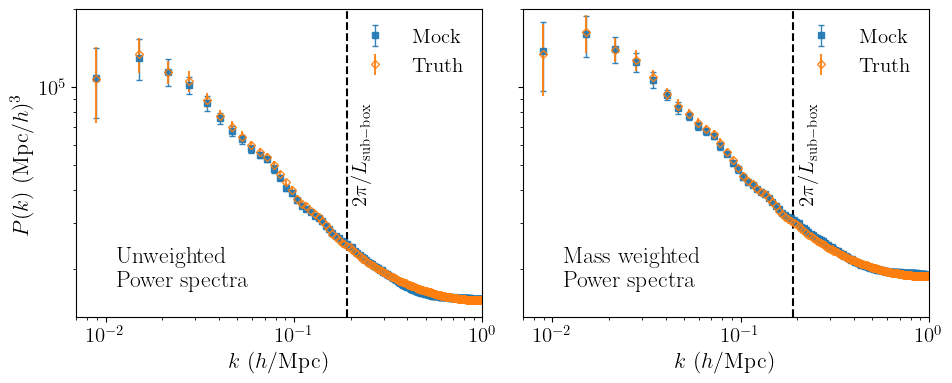

In [16]:
# pl.figure()
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(11, 4), sharey=True)
# set spacing between subplots:
pl.subplots_adjust(wspace=0.1)
ax1.errorbar(Pk_truth_full.k3D, Pk_halos_mean, Pk_halos_std, ms=4.0, ls='', marker='s', alpha=0.9, label='Mock', elinewidth=1.0, capsize=2.0, capthick=1.0)
ax1.errorbar(Pk_truth_full.k3D, Pk_truth_mean, Pk_truth_std, ms=4.0, ls='', marker='D', alpha=0.9, label='Truth', markerfacecolor='none')

# ax1.errorbar(Pk_truth_full.k3D, Pk_ratio_mean, Pk_ratio_std, ms=4.0, ls='', marker='s', alpha=0.7, label='Mock')
# ax1.errorbar(1.02*Pk_truth_full.k3D, Pk_ratio_mean_weighted, Pk_ratio_std_weighted, ms=4.0, ls='', marker='D', alpha=0.7, label='Truth')
ax1.axhline(1.0, ls='--', color='k')

ax1.legend(fontsize=15, loc='upper right', frameon=False)
# ax1.set_yscale('log')
# ax1.set_ylim(0.8,1.2)
ax1.set_ylim(1.3e4,1.7e5)
ax1.set_xlim(0.007, 1.0)
ax1.set_xscale('log')
ax1.text(0.1, 0.1, r'Unweighted' + '\n' + 'Power spectra', fontsize=17, transform=ax1.transAxes)
ax1.tick_params(axis='both', labelsize=15)
# ax1.set_xlabel(r'$N_{\rm halo}$', fontsize=16)
ax1.set_xlabel(r'$k$ ($h$/Mpc)', fontsize=16)
# ax1.set_ylabel('Histogram', fontsize=16)
ax1.set_ylabel(r'$P(k)$ $({\rm Mpc}/h)^3$', fontsize=16)
ax1.axvline(0.19, ls='--', color='k')
ax1.text(0.675, 0.38, r'$2\pi/L_{\rm sub-box}$', fontsize=15, transform=ax1.transAxes, rotation=90)

# ax1.set_ylim(1e4, 2e5)
ax2.errorbar(Pk_truth_full.k3D, Pk_halos_mean_weighted, Pk_halos_std_weighted, ms=4.0, ls='', marker='s', alpha=0.9, label='Mock', elinewidth=1.0, capsize=2.0, capthick=1.0)
ax2.errorbar(Pk_truth_full.k3D, Pk_truth_mean_weighted, Pk_truth_std_weighted, ms=4.0, ls='', marker='D', alpha=0.9, label='Truth', markerfacecolor='none')
ax2.set_ylim(1.3e4,2e5)
ax2.set_xlim(0.007, 1.0)

ax2.legend(fontsize=15, loc='upper right', frameon=False)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.text(0.1, 0.1, r'Mass weighted' + '\n' + 'Power spectra', fontsize=17, transform=ax2.transAxes)
ax2.tick_params(axis='both', labelsize=15)
ax2.set_xlabel(r'$k$ ($h$/Mpc)', fontsize=16)
ax2.axvline(0.19, ls='--', color='k')
ax2.text(0.675, 0.38, r'$2\pi/L_{\rm sub-box}$', fontsize=15, transform=ax2.transAxes, rotation=90)

# ax2.ylabel('Histogram', fontsize=16)
# ax2.set_ylim(1, 3e4)
pl.savefig('halo_power_spectra.pdf', bbox_inches='tight')




Text(0, 0.5, 'Histogram')

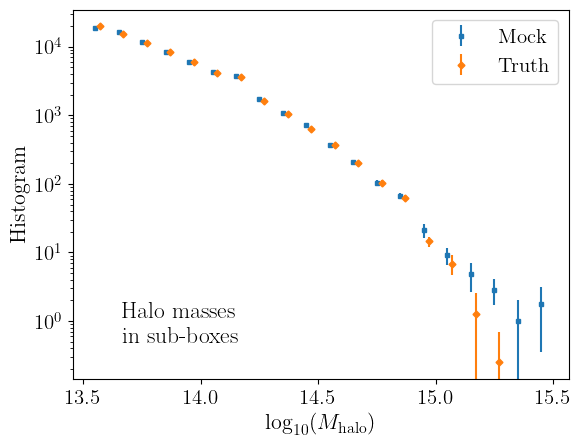

In [42]:
pl.figure()
pl.errorbar(lgM_halo_centers, M_halo_mean_all, M_halo_std_all, ms=3.5, ls='', marker='s', label='Mock')
pl.errorbar(0.02+lgM_halo_centers, M_halo_mean_truth_all, M_halo_std_truth_all, ms=3.5, ls='', marker='D', label='Truth')
pl.legend(fontsize=15)
pl.yscale('log')
# set x-ticks to be even integers:
# _ = pl.xticks(np.arange(0, 21, 2))
# 
pl.text(0.1, 0.1, r'Halo masses' + '\n' + 'in sub-boxes', fontsize=17, transform=pl.gca().transAxes)
pl.tick_params(axis='both', labelsize=15)
pl.xlabel(r'$\log_{10}(M_{\rm halo})$', fontsize=16)
pl.ylabel('Histogram', fontsize=16)


In [ ]:
fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(18, 5))
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)

ax1.scatter(pos_h_truth_orig[:,0], pos_h_truth_orig[:,1], s=0.001)
ax1.set_title('Halos Truth Quijote', size=16)


ax2.scatter(pos_all_truth_concat[:,0], pos_all_truth_concat[:,1], s=0.001)
ax2.set_title('Halos Truth (tokenized)', size=16)


# ax1.set_xlim(400,600)
# ax1.set_ylim(400,600)
# fig.add_subplot(121)
ax3.scatter(pos_all_concat[:,0], pos_all_concat[:,1], s=0.001)
ax3.set_title('Halos Mock (tokenized)', size=16)
# ax2.set_xlim(400,600)
# ax2.set_ylim(400,600)


